Exploratory Data Analysis & Intro


Goal
    1 . Investigate top-paying roles and skills in the data science industry.
    2 . Use Python to explore a real-live dataset on job postings.
    3 . For job-seekers: use these insights to help find the best job   opportunities.

Questions to Answer
   1 . What are the most demanded skills for the top 3 most popular data roles?
   2 . How are in-demand skills trending for Data Analysts?
   3 . How well do jobs and skills pay for Data Analysts?
   4 . What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on INDIA  Data Analyst roles, but you can adapt to any of the following:

Exploratory Data Analysis for all Data Roles

Roles to Explore 

In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns # type: ignore
from datasets import load_dataset
import matplotlib.pyplot as plt  

In [4]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/kuruvayoganath/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Oct  9 12:02:06 2024).


In [5]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

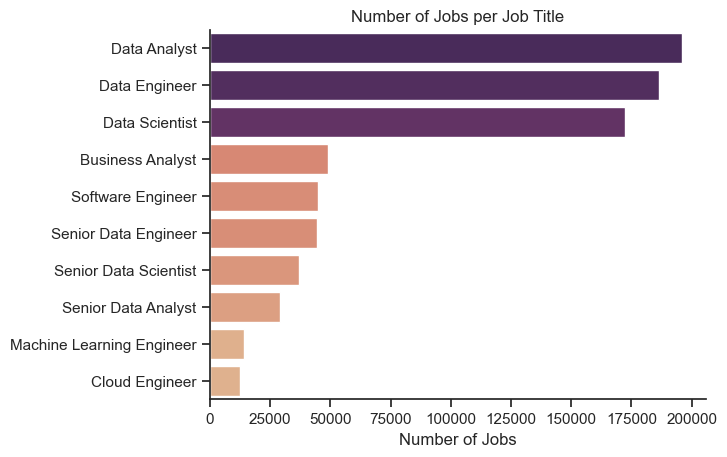

In [6]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='flare', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

In [7]:
df['job_country'].value_counts()

job_country
United States     206292
India              51088
United Kingdom     40375
France             39922
Germany            27694
                   ...  
Guinea                 4
Mauritania             3
Lesotho                3
Bhutan                 3
Maldives               2
Name: count, Length: 160, dtype: int64

Countries to Explore

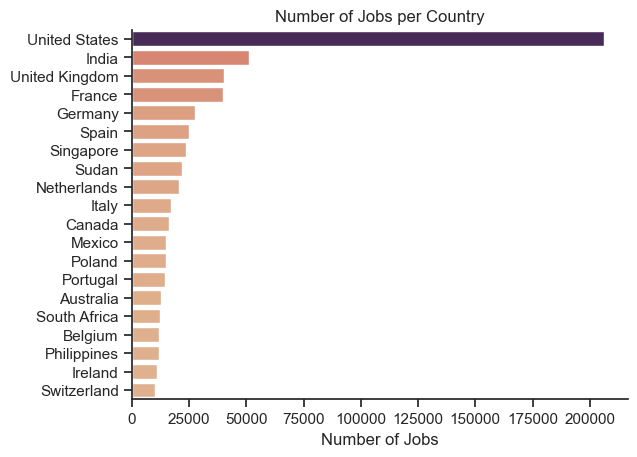

In [8]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='flare', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Companies to Explore

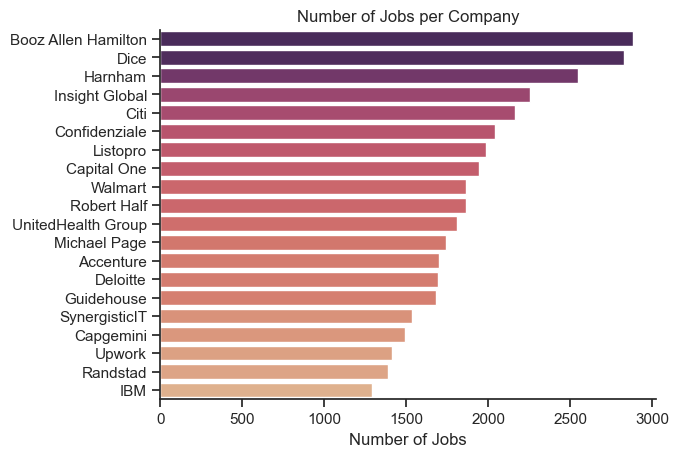

In [9]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='flare', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities

Exploratory Data Analysis for Data Analysts in the INDIA 

Filter for INDIA  Data Analyst roles 

In [14]:
df_DA_India = df[(df['job_country'] == 'India') &  (df['job_title_short'] == 'Data Analyst')]



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


Locations to Explore: 

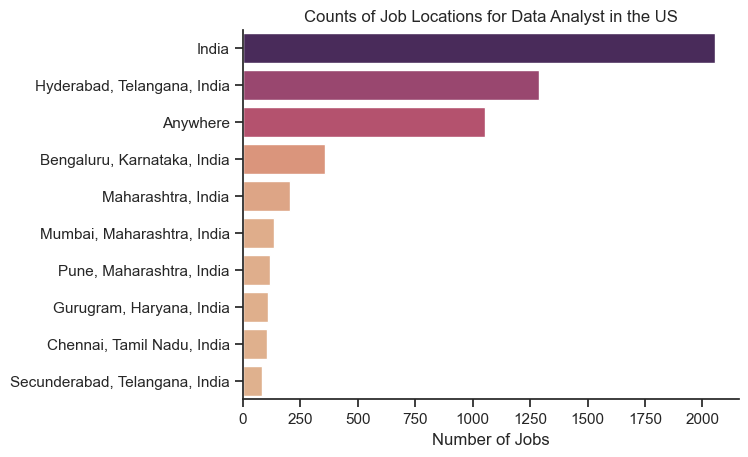

In [11]:
df_plot = df_DA_India['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='flare', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Companies to Explore:

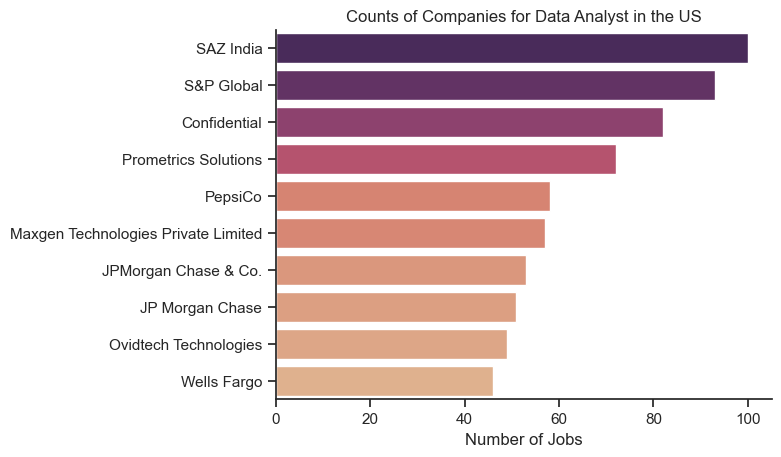

In [12]:
df_plot = df_DA_India['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='flare', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

Job Opportunities 

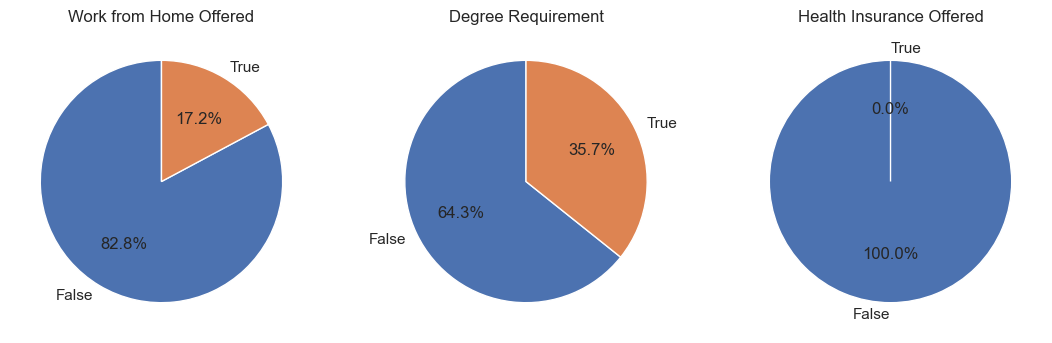

In [15]:


dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    # Ensure both 'True' and 'False' are present in the counts
    counts = df_DA_India[column].value_counts().reindex([False, True], fill_value=0)
    
    ax[i].pie(counts, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()
